<a href="https://colab.research.google.com/github/Aditya12D/EDA-PROJECTS/blob/main/Zomato_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Machine learning and Data analysis/project/zomato[1].csv')

In [3]:
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
print(df.columns)

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


In [7]:
df.isnull().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


In [8]:
df[['location','listed_in(city)']]

,location,listed_in(city)
0,Banashankari,Banashankari
1,Banashankari,Banashankari
2,Banashankari,Banashankari
3,Banashankari,Banashankari
4,Basavanagudi,Banashankari
...,...,...
51712,Whitefield,Whitefield
51713,Whitefield,Whitefield
51714,Whitefield,Whitefield
51715,"ITPL Main Road, Whitefield",Whitefield


In [9]:
df=df.drop(columns=['dish_liked','menu_item','url','phone','location'])

In [29]:
df=df.drop_duplicates()

In [30]:
# Remove commas and currency symbol if present
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].replace(',', '', regex=True)
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')


/tmp/ipython-input-30-1559915291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['approx_cost(for two people)'] = df['approx_cost(for two people)'].replace(',', '', regex=True)
/tmp/ipython-input-30-1559915291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')


In [31]:
df['votes']=pd.to_numeric(df['votes'])

/tmp/ipython-input-31-382860584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['votes']=pd.to_numeric(df['votes'])


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51667 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      51667 non-null  object 
 1   name                         51667 non-null  object 
 2   online_order                 51667 non-null  object 
 3   book_table                   51667 non-null  object 
 4   rate                         41634 non-null  float64
 5   votes                        51667 non-null  int64  
 6   rest_type                    51440 non-null  object 
 7   cuisines                     51622 non-null  object 
 8   approx_cost(for two people)  51322 non-null  float64
 9   reviews_list                 51667 non-null  object 
 10  listed_in(type)              51667 non-null  object 
 11  listed_in(city)              51667 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 5.1+ MB


In [33]:
# Clean 'rate' column
df['rate'] = df['rate'].astype(str).apply(lambda x: x.split('/')[0].strip())
df['rate'] = df['rate'].replace(['NEW','-','nan'], np.nan)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')


/tmp/ipython-input-33-4232540212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rate'] = df['rate'].astype(str).apply(lambda x: x.split('/')[0].strip())
/tmp/ipython-input-33-4232540212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rate'] = df['rate'].replace(['NEW','-','nan'], np.nan)
/tmp/ipython-input-33-4232540212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

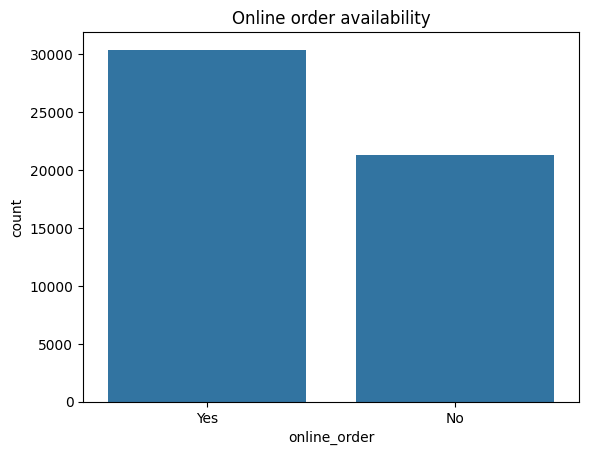

In [41]:
sns.countplot(x='online_order', data=df)
plt.title('Online order availability')
plt.show()


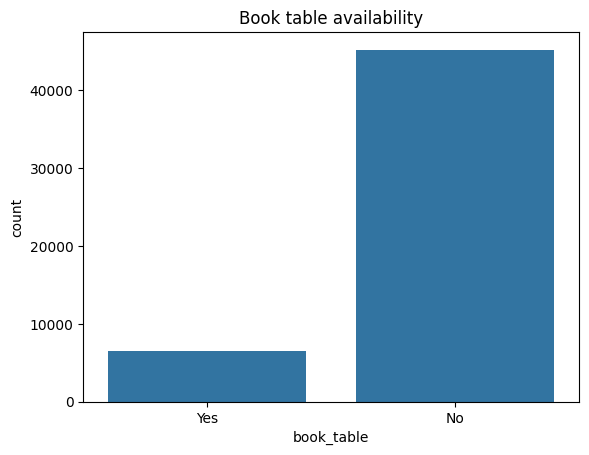

In [44]:
sns.countplot(x='book_table', data=df)
plt.title('Book table availability')
plt.show()

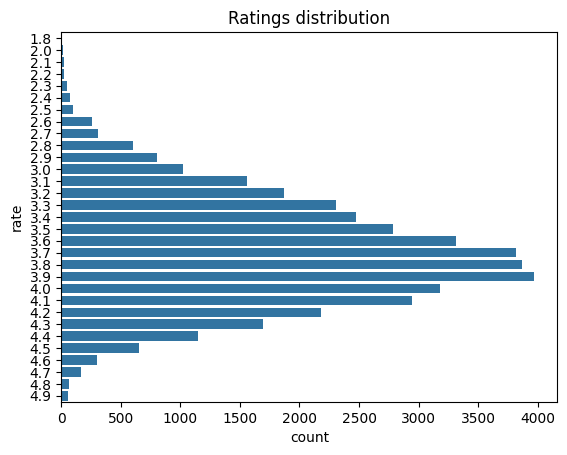

In [47]:
sns.countplot(y='rate', data=df)
plt.title('Ratings distribution')
plt.show()

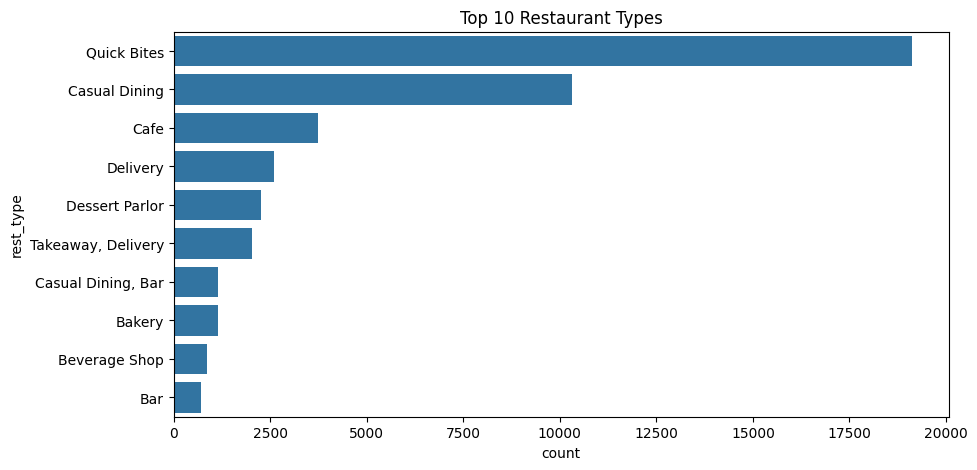

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(y='rest_type', data=df, order=df['rest_type'].value_counts().index[:10])
plt.title('Top 10 Restaurant Types')
plt.show()


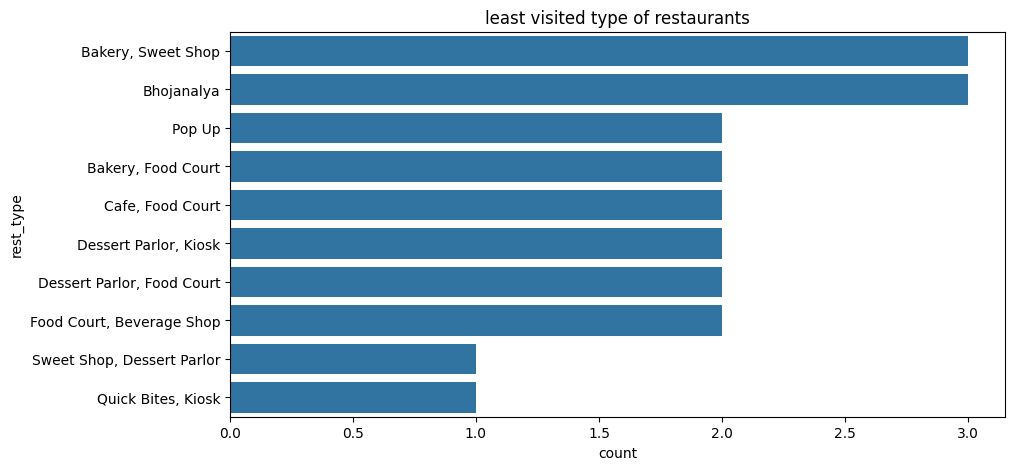

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(y='rest_type', data=df, order=df['rest_type'].value_counts().index[-10:])
plt.title('least visited type of restaurants')
plt.show()


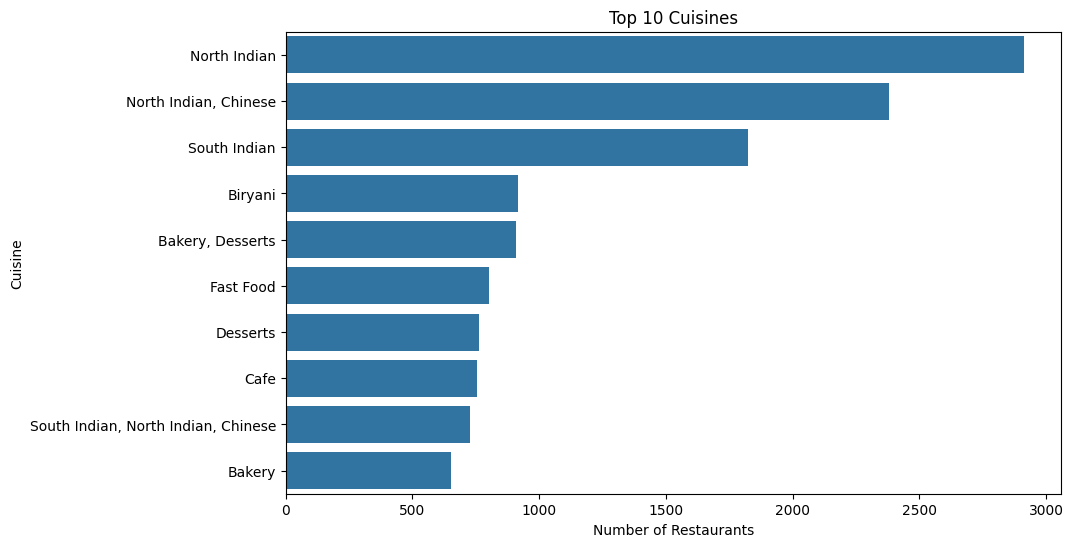

In [55]:
top_cuisines = df['cuisines'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_cuisines.index, x=top_cuisines.values)
plt.title('Top 10 Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()


In [36]:
grouped=df.groupby('listed_in(city)')

In [37]:
grouped.size().sort_values(ascending=False)

,0
listed_in(city),
BTM,3270
Koramangala 7th Block,2938
Koramangala 5th Block,2836
Koramangala 4th Block,2778
Koramangala 6th Block,2623
Jayanagar,2366
JP Nagar,2096
Indiranagar,1858
Church Street,1809


In [38]:
second_group=df.groupby('name')

In [39]:
second_group.size()

,0
name,
#FeelTheROLL,2
#L-81 Cafe,9
#Vibes Restro,3
#refuel,3
'Brahmins' Thatte Idli,1
...,...
late100,5
nu.tree,8
re:cess - Hilton Bangalore Embassy GolfLinks,3


In [42]:
second_group.get_group('Jalsa')

,address,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
456,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Delivery,Banashankari
559,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Dine-out,Banashankari
2488,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Basavanagudi
2966,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Delivery,Basavanagudi
3462,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,804,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n Super ambience\nGreat...",Dine-out,Basavanagudi
7607,"25/7, Doddannakundi, Outer Ring Road, Mahadeva...",Jalsa,Yes,Yes,4.2,2173,Casual Dining,"North Indian, Mughlai",1500.0,"[('Rated 4.0', 'RATED\n A pretty decent place...",Delivery,Brookefield
19401,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,783,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Jayanagar
20399,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,783,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Delivery,Jayanagar
21302,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,783,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Dine-out,Jayanagar


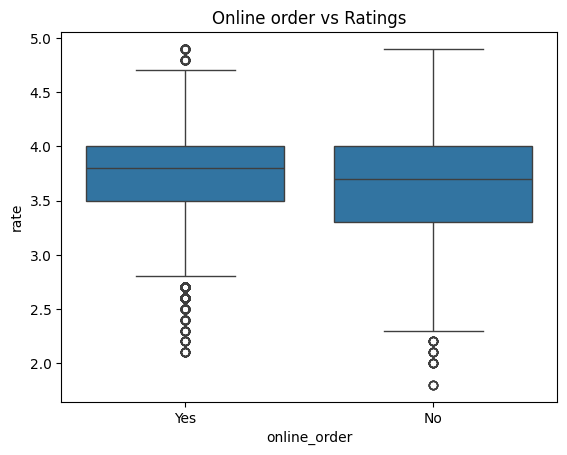

In [43]:
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Online order vs Ratings')
plt.show()

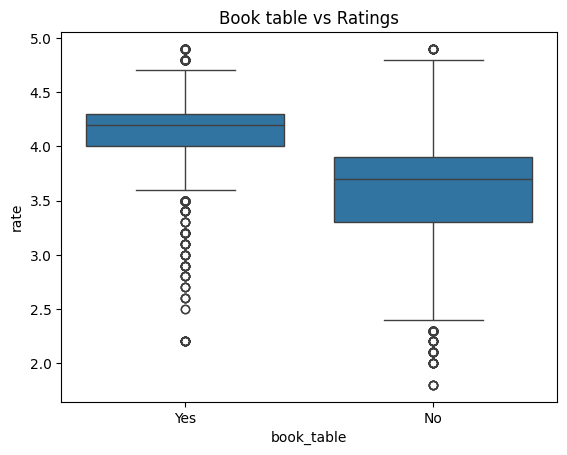

In [45]:
sns.boxplot(x='book_table', y='rate', data=df)
plt.title('Book table vs Ratings')
plt.show()

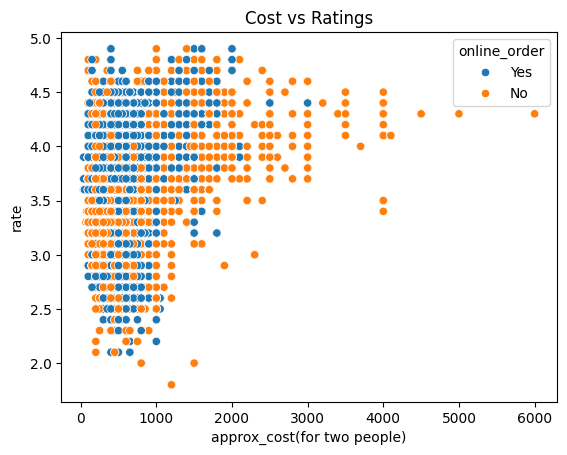

In [60]:
sns.scatterplot(x='approx_cost(for two people)', y='rate' , data=df, hue='online_order')
plt.title('Cost vs Ratings')
plt.show()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51667 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      51667 non-null  object 
 1   name                         51667 non-null  object 
 2   online_order                 51667 non-null  object 
 3   book_table                   51667 non-null  object 
 4   rate                         41634 non-null  float64
 5   votes                        51667 non-null  int64  
 6   rest_type                    51440 non-null  object 
 7   cuisines                     51622 non-null  object 
 8   approx_cost(for two people)  51322 non-null  float64
 9   reviews_list                 51667 non-null  object 
 10  listed_in(type)              51667 non-null  object 
 11  listed_in(city)              51667 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 5.1+ MB


In [61]:
df.corr(numeric_only=True)

,rate,votes,approx_cost(for two people)
rate,1.000000,0.434023,0.385096
votes,0.434023,1.000000,0.381787
approx_cost(for two people),0.385096,0.381787,1.000000
